In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import ttest_rel, ttest_ind
%matplotlib inline

In [2]:
population = pd.read_csv('Data_clean/Population_clean.csv', index_col=0)
population.head()

,Year,Population
0,1960,408368028
1,1961,411717673
2,1962,415542095
3,1963,419404381
4,1964,422938386


In [3]:
food = pd.read_csv('Data_clean/food_clean.csv', index_col=0)
food.head()

,Year,All Sugar forms,Fruits & Veggies,"Sweetners, Honey, Dates"
0,1990,274136,169329,3394
1,1991,237782,163328,2954
2,1992,231257,162671,3225
3,1993,235362,153891,3323
4,1994,207899,146089,3674


In [4]:
food = pd.merge(food, population, on='Year')
food.head()

,Year,All Sugar forms,Fruits & Veggies,"Sweetners, Honey, Dates",Population
0,1990,274136,169329,3394,476014973
1,1991,237782,163328,2954,477383683
2,1992,231257,162671,3225,478743459
3,1993,235362,153891,3323,480227396
4,1994,207899,146089,3674,481398505


In [5]:
food['All Sugar forms pp'] = food['All Sugar forms'] / food['Population'] * 1000 * 1000
food['Fruits & Veggies pp'] = food['Fruits & Veggies'] / food['Population'] * 1000 * 1000
food['Sweetners, Honey, Dates pp'] = food['Sweetners, Honey, Dates'] / food['Population'] * 1000 * 1000
food.head()

,Year,All Sugar forms,Fruits & Veggies,"Sweetners, Honey, Dates",Population,All Sugar forms pp,Fruits & Veggies pp,"Sweetners, Honey, Dates pp"
0,1990,274136,169329,3394,476014973,575.897851,355.722004,7.130028
1,1991,237782,163328,2954,477383683,498.094109,342.131509,6.187895
2,1992,231257,162671,3225,478743459,483.049942,339.787410,6.736384
3,1993,235362,153891,3323,480227396,490.105317,320.454437,6.919639
4,1994,207899,146089,3674,481398505,431.864656,303.467914,7.631931


In [6]:
food.to_csv('Data_Clean/food_final.csv')

## Analysis

In [15]:
food.tail()

,Year,All Sugar forms,Fruits & Veggies,"Sweetners, Honey, Dates",Population,All Sugar forms pp,Fruits & Veggies pp,"Sweetners, Honey, Dates pp"
20,2010,177427,164858,8231,503067728,352.690085,327.705378,16.361614
21,2011,224497,171685,8393,503506293,445.867317,340.978856,16.669106
22,2012,215820,165326,8381,504605401,427.700535,327.634226,16.609018
23,2013,200604,173941,8173,506199072,396.294681,343.621728,16.145822
24,2014,231641,158517,17524,507877648,456.096071,312.116512,34.504373


In [16]:
food.drop(index=24, inplace=True)
food.tail()

,Year,All Sugar forms,Fruits & Veggies,"Sweetners, Honey, Dates",Population,All Sugar forms pp,Fruits & Veggies pp,"Sweetners, Honey, Dates pp"
19,2009,190284,171577,8048,502630427,378.576365,341.358165,16.011764
20,2010,177427,164858,8231,503067728,352.690085,327.705378,16.361614
21,2011,224497,171685,8393,503506293,445.867317,340.978856,16.669106
22,2012,215820,165326,8381,504605401,427.700535,327.634226,16.609018
23,2013,200604,173941,8173,506199072,396.294681,343.621728,16.145822


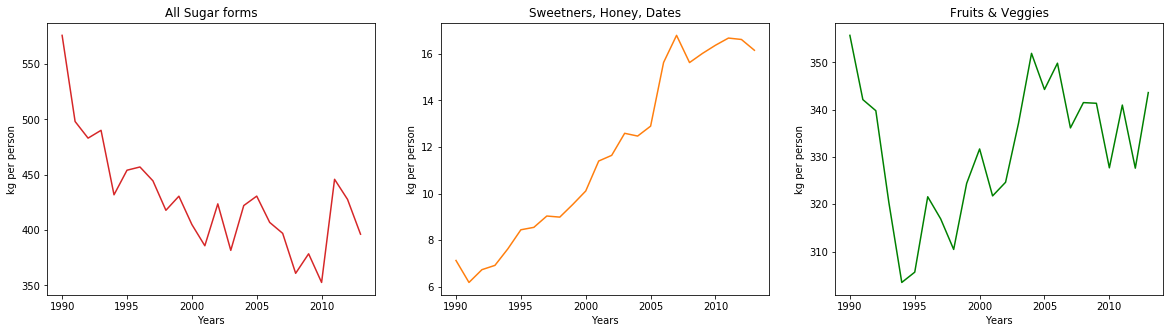

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].plot(food['Year'], food['All Sugar forms pp'], color='tab:red')
axs[0].set_title('All Sugar forms')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('kg per person')

axs[1].plot(food['Year'], food['Sweetners, Honey, Dates pp'], color='tab:orange')
axs[1].set_title('Sweetners, Honey, Dates')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('kg per person')

axs[2].plot(food['Year'], food['Fruits & Veggies pp'], color='g')
axs[2].set_title('Fruits & Veggies')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('kg per person')

plt.show()

#### ANOVA

In [8]:
f_oneway(food['All Sugar forms pp'], food['Sweetners, Honey, Dates pp'], food['Fruits & Veggies pp'])

F_onewayResult(statistic=1381.0854295250206, pvalue=3.7725313068548746e-58)

In [9]:
f_oneway(food['All Sugar forms pp'], food['Sweetners, Honey, Dates pp'])

F_onewayResult(statistic=1837.5215181246315, pvalue=6.365967792461749e-40)

In [10]:
f_oneway(food['All Sugar forms pp'], food['Fruits & Veggies pp'])

F_onewayResult(statistic=96.56750904771273, pvalue=4.472506925805396e-13)

In [11]:
f_oneway(food['Sweetners, Honey, Dates pp'], food['Fruits & Veggies pp'])

F_onewayResult(statistic=10273.958623967834, pvalue=1.2009590516954934e-57)

#### TTests (independent)

In [12]:
ttest_ind(food['All Sugar forms pp'], food['Sweetners, Honey, Dates pp'])

Ttest_indResult(statistic=42.8663214904738, pvalue=6.365967792459755e-40)

In [13]:
ttest_ind(food['All Sugar forms pp'], food['Fruits & Veggies pp'])

Ttest_indResult(statistic=9.826876871504643, pvalue=4.472506925805305e-13)

In [14]:
ttest_ind(food['Sweetners, Honey, Dates pp'], food['Fruits & Veggies pp'])

Ttest_indResult(statistic=-101.36053780425362, pvalue=1.2009590516963246e-57)